In [56]:
#imports
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math

## Load the data

In [140]:
def file_name(part, letter):
    return f'resources/data/EM1 Part {part}{letter}'
#Read in data from the csv file
data1A1_table = np.loadtxt(file_name(1, "A1"), delimiter=',', skiprows=1)
data1A1 = {
    "time": data1A1_table[:,0],            #time
    "A7_volts": data1A1_table[:,2],        #A7_volts
    "A8_volts": data1A1_table[:,3],        #A8_volts
}
data1A2_table = np.loadtxt(file_name(1, "A2"), delimiter=',', skiprows=1)
data1A2 = {
    "time": data1A2_table[:,0],            #time
    "A7_volts": data1A2_table[:,4],        #A7_volts
}
data1B1_table = np.loadtxt(file_name(1, "B1"), delimiter=',', skiprows=1)
data1B1 = {
    "time": data1B1_table[:,0],            #time
    "high_gain": data1B1_table[:,2],       #high gain
    "A7_volts": data1B1_table[:,4],        #A7_volts
}
data1B2_table = np.loadtxt(file_name(1, "B2"), delimiter=',', skiprows=1)
data1B2 = {
    "time": data1B2_table[:,0],            #time
    "A7_volts": data1B2_table[:,4],        #A7_volts
}
data2A_table = np.loadtxt(file_name(2, "A"), delimiter=',', skiprows=1)
data2A = {
    "time": data2A_table[:,0],            #time
    "A7_volts": data2A_table[:,4],        #A7_volts
}
data2AC_table = np.loadtxt(file_name(2, "A current.csv"), delimiter=',', skiprows=1)
data2AC = {
    "volts": data2AC_table[:,0],       #volts
    "amps": data2AC_table[:,1],        #amps
}
data2AC_exp_table = np.loadtxt(file_name(2, "A expected.csv"), delimiter=',', skiprows=1)
data2AC_exp = {
    "volts": data2AC_exp_table[:,0],       #volts
    "amps": data2AC_exp_table[:,1],        #amps
}
data2B_table = np.loadtxt(file_name(2, "B"), delimiter=',', skiprows=1)
data2B = {
    "time": data2B_table[:,0],            #time
    "A7_volts": data2B_table[:,4],        #A7_volts
    "A8_volts": data2B_table[:,5],        #A8_volts
}
data2B_ext_table = np.loadtxt(file_name(2, "B Ext"), delimiter=',', skiprows=1)
data2B_ext = {
    "time": data2B_ext_table[:,0],            #time
    "A7_volts": data2B_ext_table[:,4],        #A7_volts
    "A8_volts": data2B_ext_table[:,5],        #A8_volts
}
data2BC_g_table = np.loadtxt(file_name(2, "B current_green.csv"), delimiter=',', skiprows=1)
data2BC_g = {
    "A7_volts": data2BC_g_table[:,0],        #A7_volts
    "A8_volts": data2BC_g_table[:,1],        #A8_volts
    "amps": data2BC_g_table[:,2],            #amps
}
data2BC_exp_g_table = np.loadtxt(file_name(2, "B expected_green.csv"), delimiter=',', skiprows=1)
data2BC_g_exp = {
    "A7_volts": data2BC_exp_g_table[:,0],        #A7_volts
    "A8_volts": data2BC_exp_g_table[:,1],        #A8_volts
    "amps": data2BC_exp_g_table[:,2],            #amps
}
data2BC_r_table = np.loadtxt(file_name(2, "B current_red.csv"), delimiter=',', skiprows=1)
data2BC_r = {
    "A7_volts": data2BC_r_table[:,0],        #A7_volts
    "A8_volts": data2BC_r_table[:,1],        #A8_volts
    "amps": data2BC_r_table[:,2],            #amps
}
data2BC_exp_r_table = np.loadtxt(file_name(2, "B expected_red.csv"), delimiter=',', skiprows=1)
data2BC_r_exp = {
    "A7_volts": data2BC_exp_r_table[:,0],        #A7_volts
    "A8_volts": data2BC_exp_r_table[:,1],        #A8_volts
    "amps": data2BC_exp_r_table[:,2],            #amps
}

def get_data_slice(data, start=0, stop=-1, step=None):
    val = {}
    for item in data.keys():
        val[item] = data[item][start:stop:step]
    return val

In [80]:
def linear_fit(x, m, c):
    return m * x + c

## Part 0

In [3]:
# no code necessary

## Part 1

### a) Measure Voltage

- compare iolab output to dmm measurement


### b) Measure Current

- compare iolab output to predicted current

- compare dmm measurement to predicted current

In [4]:
### Part 1A1

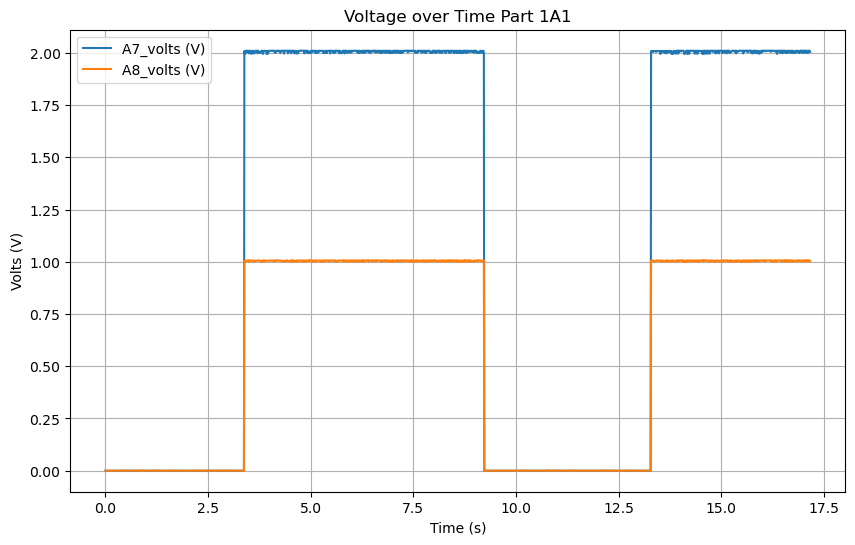

In [5]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plotting A7_volts
plt.plot(data1A1["time"], data1A1["A7_volts"], label="A7_volts (V)")

# Plotting A8_volts
plt.plot(data1A1["time"], data1A1["A8_volts"], label="A8_volts (V)")

# Adding labels and title
plt.xlabel("Time (s)")
plt.ylabel("Volts (V)")
plt.title("Voltage over Time Part 1A1")
plt.legend()  # Show legend

# Display the plot
plt.grid(True)  # Add grid
plt.show()

In [6]:
# Assuming you already have loaded your data into data1A1 dictionary

# Find the indices corresponding to time 4 and 8
index_time_4 = np.where(data1A1["time"] == 4)[0][0]
index_time_8 = np.where(data1A1["time"] == 8)[0][0]

# Extract A7_volts and A8_volts data from time 4 to 8
A7_subset = data1A1["A7_volts"][index_time_4:index_time_8+1]
A8_subset = data1A1["A8_volts"][index_time_4:index_time_8+1]

# Calculate the ratio A8/A7 for the subset
ratio_subset = A8_subset / A7_subset

# Calculate the average of the ratio
transfer_ratio_exp = np.mean(ratio_subset)

# Calculate the standard error of the mean
transfer_ratio_exp_error = np.std(ratio_subset) / np.sqrt(len(ratio_subset))

print("Transfer Ratio (H):", transfer_ratio_exp, "+-", transfer_ratio_exp_error)

Transfer Ratio (H): 0.5005873835730561 +- 7.217615229480523e-05


In [162]:
transfer_ratio_theory = 0.5
# we can do comparison test, but they clearly are very similar values
# "Use 1% as the uncertainty in the nominal value for resistors of 1"
# our resistor has a resistance of 10,000 - 1% is 100
# error for transfer ratio is error for V, which is 0.01 (1% of 1)

transfer_ratio_diff = transfer_ratio_exp - transfer_ratio_theory
transfer_ratio_error = 2*np.sqrt(transfer_ratio_exp_error**2 + 0.01**2)

print(transfer_ratio_diff, "<", transfer_ratio_error)

0.0005873835730560995 < 0.00014435230458961047


In [165]:
# give average value of this: A8_subset
A8_avg = np.mean(A8_subset)
print(A8_avg)

1.0048803079157993


In [12]:
### Part 1B1

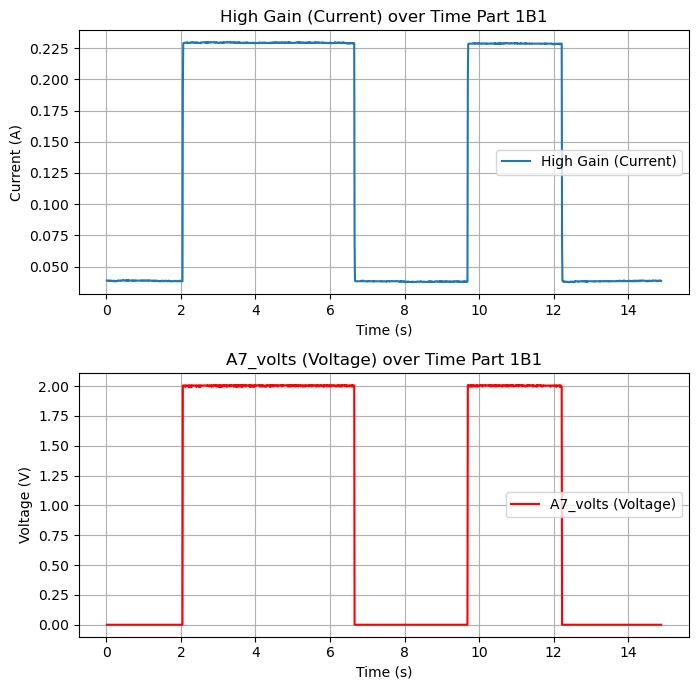

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 7))

# Plotting high_gain (current)
ax1.plot(data1B1["time"], data1B1["high_gain"], label="High Gain (Current)")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Current (A)")
ax1.set_title("High Gain (Current) over Time Part 1B1")
ax1.legend()
ax1.grid(True)

# Plotting A7_volts (voltage)
ax2.plot(data1B1["time"], data1B1["A7_volts"], label="A7_volts (Voltage)", color="red")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Voltage (V)")
ax2.set_title("A7_volts (Voltage) over Time Part 1B1")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [14]:
predicted_current = 0.2
# Find the indices corresponding to time 2.5 and 6
index_time_2_5 = np.where(data1B1["time"] == 2.5)[0][0]
index_time_6 = np.where(data1B1["time"] == 6)[0][0]

# Extract high_gain data from time 2.5 to 6
high_gain_subset = data1B1["high_gain"][index_time_2_5:index_time_6+1]

# Calculate the average value
average_current_1B1 = np.mean(high_gain_subset)
error_current_1B1 = np.std(high_gain_subset) / np.sqrt(len(high_gain_subset))

print("Average current from 2.5 to 6 seconds:", average_current_1B1, "+-", error_current_1B1)


Average current from 2.5 to 6 seconds: 0.22942821490458953 +- 1.189168230836675e-05


In [15]:
# we can do comparison test
# "Use 1% as the uncertainty in the nominal value for resistors of 1"
# our resistor has a resistance of 10,000 - 1% is 100
# error for transfer ratio is error for V, which is 0.01 (1% of 1)

current_diff_1B1 = np.abs(average_current_1B1 - predicted_current)
current_error_1B1 = 2*np.sqrt(error_current_1B1**2 + 0.01**2)

print(current_diff_1B1, ">", current_error_1B1)

0.029428214904589522 > 0.020000014141205814


In [16]:
# our current is slighly larger than the accepted value and does not fit in the range

In [17]:
### Part 1B2

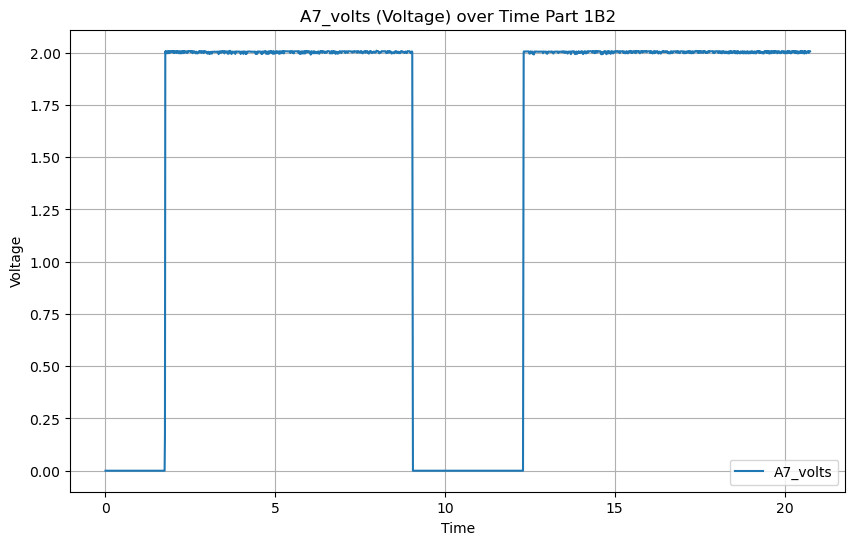

In [18]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plotting A7_volts
plt.plot(data1B2["time"], data1B2["A7_volts"], label="A7_volts")

# Adding labels and title
plt.xlabel("Time")
plt.ylabel("Voltage")
plt.title("A7_volts (Voltage) over Time Part 1B2")
plt.legend()  # Show legend

# Display the plot
plt.grid(True)
plt.show()

In [19]:
current_1B2 = 0.2

# current statements
print("The current measured from the DMM (1B2) is:", current_1B2)
print("The average current measured from the iolab (1B1) is:", average_current_1B1)
print("The iolab measurement (1B1) has a higher sensitivity due to it having more decimals.")

The current measured from the DMM (1B2) is: 0.2
The average current measured from the iolab (1B1) is: 0.22942821490458953
The iolab measurement (1B1) has a higher sensitivity due to it having more decimals.


## Part 2

### Resistor Part

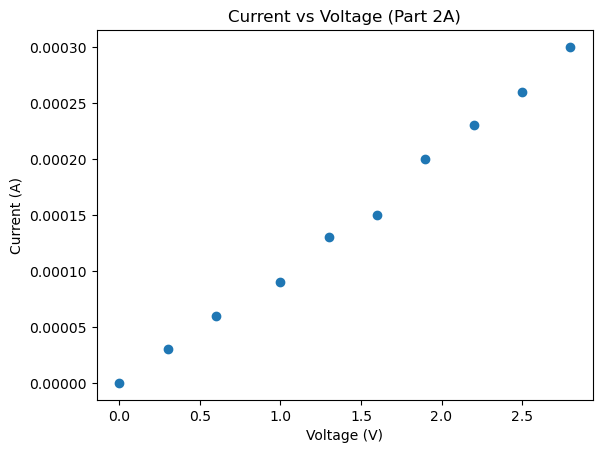

In [123]:
data2a = get_data_slice(data2AC)
plt.plot(data2a["volts"], data2a["amps"],  'o')
plt.xlabel("Voltage (V)")
plt.ylabel("Current (A)")
plt.title("Current vs Voltage (Part 2A)")
plt.show()

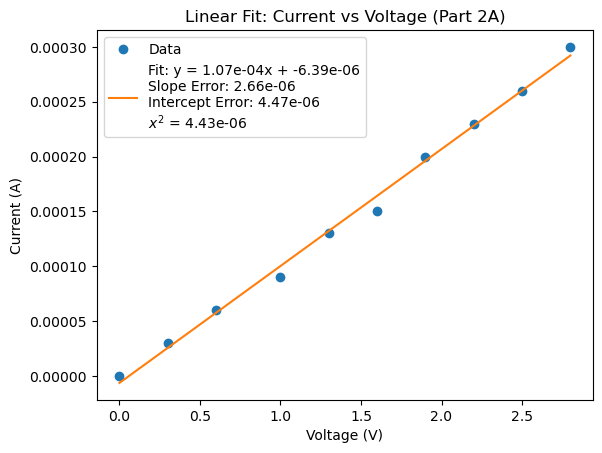

In [124]:
popt, pcov = np.polyfit(data2a["volts"], data2a["amps"], 1, cov=True)
m, c = popt
m_err, c_err = np.sqrt(np.diag(pcov))

residuals = data2a["amps"] - linear_fit(data2a["volts"], m, c)

data2a_exp = get_data_slice(data2AC_exp)
expected_2a = data2a_exp["amps"][1:]

chi_squared = np.sum(((data2a["amps"][1:] - expected_2a)**2) / expected_2a)

plt.plot(data2a["volts"], data2a["amps"], 'o', label='Data')
plt.plot(data2a["volts"], linear_fit(data2a["volts"], m, c), label=f'Fit: y = {m:.2e}x + {c:.2e}\nSlope Error: {m_err:.2e}\nIntercept Error: {c_err:.2e}\n$x^2$ = {chi_squared:.2e}')

plt.xlabel("Voltage (V)")
plt.ylabel("Current (A)")
plt.title("Linear Fit: Current vs Voltage (Part 2A)")
plt.legend()
plt.show()

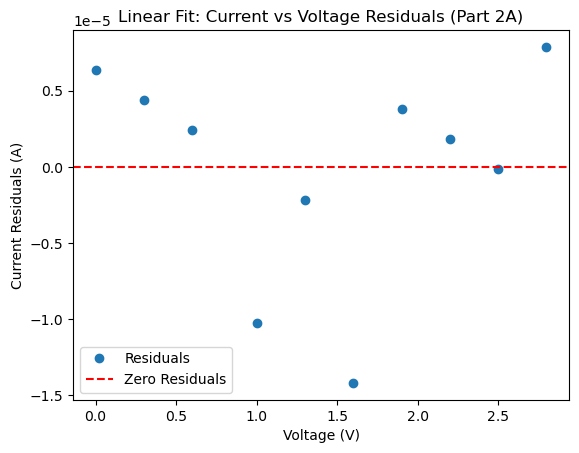

In [125]:
plt.figure()
plt.plot(data2a["volts"], residuals, 'o', label='Residuals')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residuals')
plt.title("Linear Fit: Current vs Voltage Residuals (Part 2A)")
plt.xlabel("Voltage (V)")
plt.ylabel("Current Residuals (A)")
plt.legend()
plt.show()

In [126]:
#  V = IR, I/V = 1/R

resistance = 1 / m
resistance_err = m_err / (m ** 2)

print(f"Resistance: {resistance:.2f} ± {resistance_err:.2f} Ω")

Resistance: 9379.79 ± 233.97 Ω


In [127]:
# agreement test
expected_resistance = 10000
expected_error = 100
resistance_diff = np.abs(resistance - expected_resistance)
resistance_error = 2 * np.sqrt(expected_error**2 + resistance_err**2)

print(resistance_diff, ">", resistance_error)

620.2090592334498 > 508.8868724098863


In [ ]:
# our value is slightly larger than the accepted value and does not fit in the range

In [ ]:
'''
chi-squared is too small
Systematic Errors
Uncertainty Underestimation
Data Variability: If your data exhibits very low variability or noise, it could result in a small chi-squared value
Limited Data Range: If your data range is limited, it might lead to an overestimation of the goodness of fit
'''

In [29]:
### LEDs Part
#

In [150]:
# Green LED

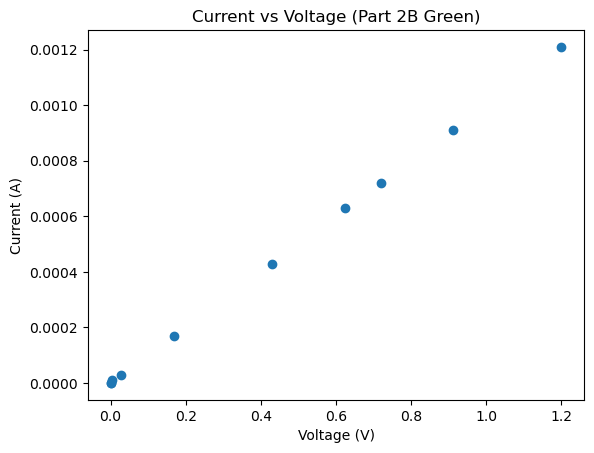

In [160]:
data2b_g = get_data_slice(data2BC_g)
plt.plot(data2b_g["A8_volts"], data2b_g["amps"],  'o')
plt.xlabel("Voltage (V)")
plt.ylabel("Current (A)")
plt.title("Current vs Voltage (Part 2B Green)")
plt.show()

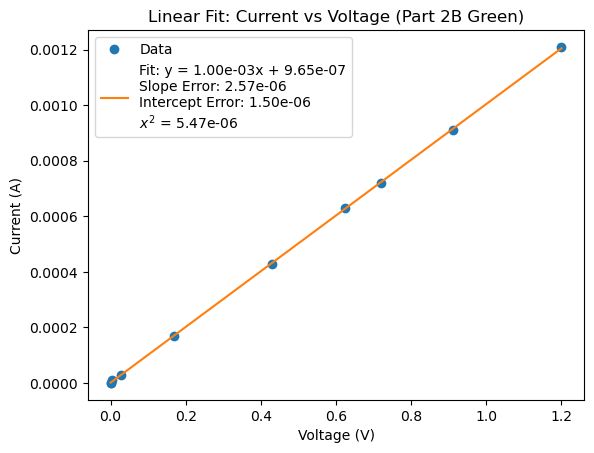

In [153]:
popt, pcov = np.polyfit(data2b_g["A8_volts"], data2b_g["amps"], 1, cov=True)
m, c = popt
m_err, c_err = np.sqrt(np.diag(pcov))

residuals = data2b_g["amps"] - linear_fit(data2b_g["A8_volts"], m, c)

data2b_exp = get_data_slice(data2BC_g_exp)
expected_2b = data2b_exp["amps"][2:]

chi_squared = np.sum(((data2b_g["amps"][2:] - expected_2b)**2) / expected_2b)

plt.plot(data2b_g["A8_volts"], data2b_g["amps"], 'o', label='Data')
plt.plot(data2b_g["A8_volts"], linear_fit(data2b_g["A8_volts"], m, c), label=f'Fit: y = {m:.2e}x + {c:.2e}\nSlope Error: {m_err:.2e}\nIntercept Error: {c_err:.2e}\n$x^2$ = {chi_squared:.2e}')

plt.xlabel("Voltage (V)")
plt.ylabel("Current (A)")
plt.title("Linear Fit: Current vs Voltage (Part 2B Green)")
plt.legend()
plt.show()

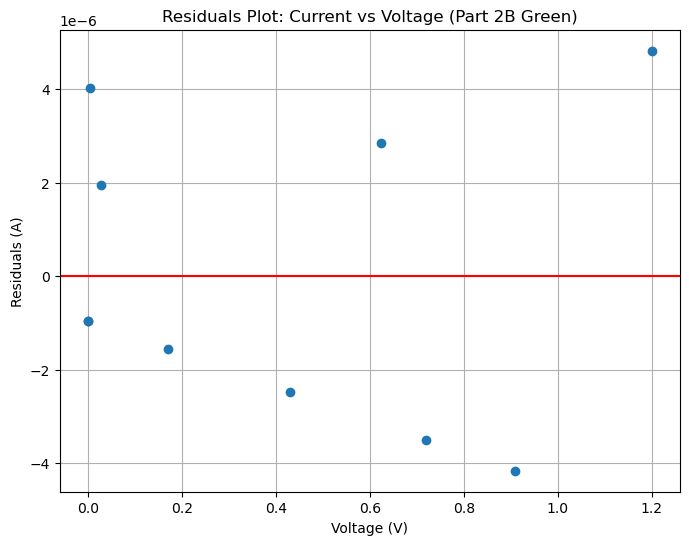

In [156]:
residuals_g = data2b_g["amps"] - linear_fit(data2b_g["A8_volts"], m, c)

plt.figure(figsize=(8, 6))
plt.plot(data2b_g["A8_volts"], residuals_g, 'o')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Voltage (V)")
plt.ylabel("Residuals (A)")
plt.title("Residuals Plot: Current vs Voltage (Part 2B Green)")
plt.grid(True)
plt.show()

In [155]:
# acts like wall until minimum voltage is reached, then acts like a wire
#  V = IR, I/V = 1/R

resistance = 1 / m
resistance_err = m_err / (m ** 2)

print(f"Resistance: {resistance:.2f} ± {resistance_err:.2f} Ω")

Resistance: 996.50 ± 2.56 Ω


In [149]:
# red LED

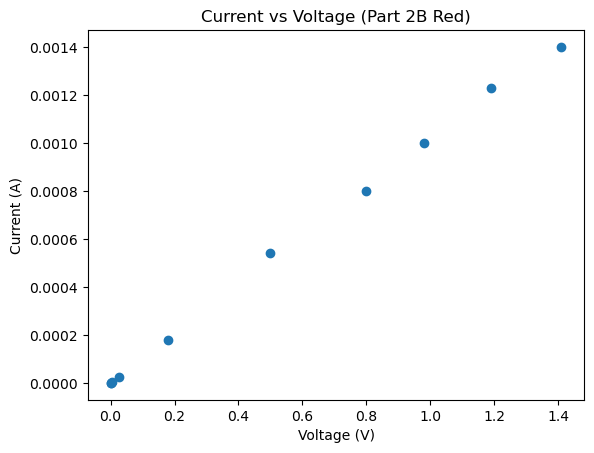

In [161]:
data2b_r = get_data_slice(data2BC_r)
plt.plot(data2b_r["A8_volts"], data2b_r["amps"],  'o')
plt.xlabel("Voltage (V)")
plt.ylabel("Current (A)")
plt.title("Current vs Voltage (Part 2B Red)")
plt.show()

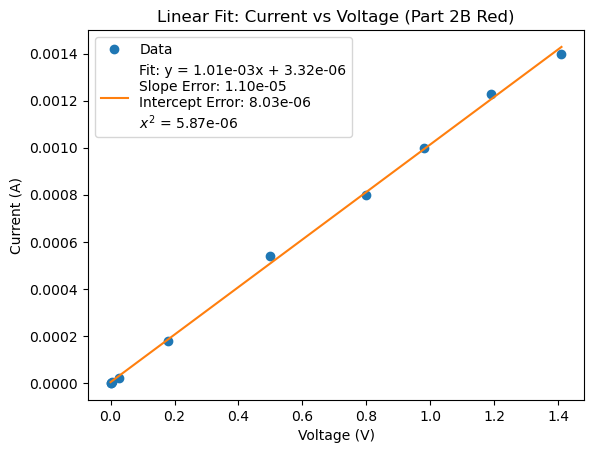

In [157]:
popt, pcov = np.polyfit(data2b_r["A8_volts"], data2b_r["amps"], 1, cov=True)
m, c = popt
m_err, c_err = np.sqrt(np.diag(pcov))

residuals = data2b_r["amps"] - linear_fit(data2b_r["A8_volts"], m, c)

data2b_exp = get_data_slice(data2BC_r_exp)
expected_2b = data2b_exp["amps"][2:]

chi_squared = np.sum(((data2b_r["amps"][2:] - expected_2b)**2) / expected_2b)

plt.plot(data2b_r["A8_volts"], data2b_r["amps"], 'o', label='Data')
plt.plot(data2b_r["A8_volts"], linear_fit(data2b_r["A8_volts"], m, c), label=f'Fit: y = {m:.2e}x + {c:.2e}\nSlope Error: {m_err:.2e}\nIntercept Error: {c_err:.2e}\n$x^2$ = {chi_squared:.2e}')

plt.xlabel("Voltage (V)")
plt.ylabel("Current (A)")
plt.title("Linear Fit: Current vs Voltage (Part 2B Red)")
plt.legend()
plt.show()

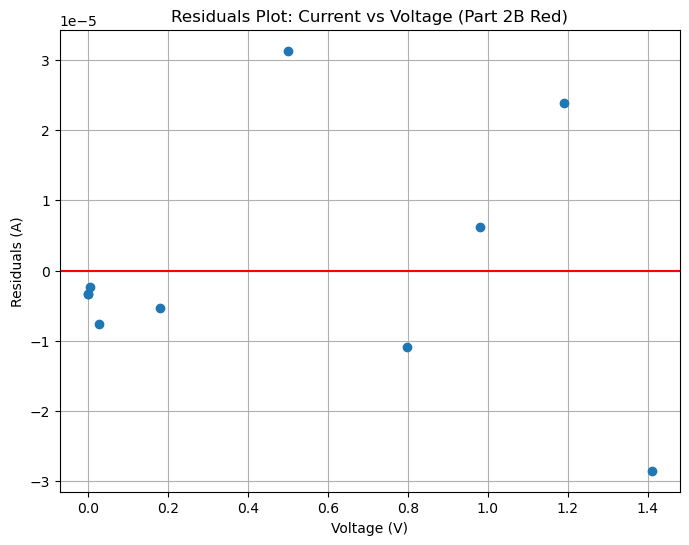

In [159]:
residuals_r = data2b_r["amps"] - linear_fit(data2b_r["A8_volts"], m, c)

plt.figure(figsize=(8, 6))
plt.plot(data2b_r["A8_volts"], residuals_r, 'o')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Voltage (V)")
plt.ylabel("Residuals (A)")
plt.title("Residuals Plot: Current vs Voltage (Part 2B Red)")
plt.grid(True)
plt.show()

In [148]:
# acts like wall until minimum voltage is reached, then acts like a wire
#  V = IR, I/V = 1/R

resistance = 1 / m
resistance_err = m_err / (m ** 2)

print(f"Resistance: {resistance:.2f} ± {resistance_err:.2f} Ω")

Resistance: 989.35 ± 10.81 Ω


In [ ]:
'''
Red is longer wavelength / lower energy than Green which is shorter wavelength / higher energy
needs less of a voltage to light up, then acts like a wire
'''

In [ ]:
'''
chi-squared value is too small for both LEDs meaning neither is a good fit
Systematic Errors
Uncertainty Underestimation
Data Variability: If your data exhibits very low variability or noise, it could result in a small chi-squared value
Limited Data Range: If your data range is limited, it might lead to an overestimation of the goodness of fit
'''

## Part 3

In [23]:
v1 = 3.3
v2 = 4.5
r1 = 4_700
r2 = 10_000
r3 = 4_700

a = np.array(
    [[r1, 0, r3],  # r1x + 0y + r3z = v1
    [0, r2, r3],  # 0x + r2y + r3z = v2
    [1, 1, -1]])  # x + y - z = 0
b = np.array([v1, v2, 0])
currents = np.linalg.solve(a, b)
print(["I%s: %.3f mA" %(i+1,a) for i, a in enumerate(currents * 1000)])

['I1: 0.236 mA', 'I2: 0.231 mA', 'I3: 0.466 mA']


In [24]:
i1, i2, i3 = currents

In [26]:
measured_v1 = 3.3
measured_v2 = 4.5
measured_I3 = .000504
measured_I2 = .000156
measured_I1 = .000168

In [27]:
measured_current_diff = measured_I3 - measured_I2 - measured_I1 
print(measured_current_diff)

0.00018


In [28]:
I1_diff_percent = 100 * ((measured_I1 - i1) / i1)
print("i1 percent diff", I1_diff_percent, "%")

I2_diff_percent = 100 * ((measured_I2 - i2) / i2)
print("i2 percent diff", I2_diff_percent, "%")

I3_diff_percent = 100 * ((measured_I3 - i3) / i3)
print("i3 percent diff", I3_diff_percent, "%")

i1 percent diff -28.71666666666666 %
i2 percent diff -32.400000000000006 %
i3 percent diff 8.050526315789474 %
